In [81]:
##Emotion Detection using tranfer learning

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from livelossplot import PlotLossesKerasTF

import tensorflow as tf
import keras

In [2]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True,rescale = 1./255,)

train_data = datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size,img_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True,rescale = 1./255,)
validation_data = datagen_validation.flow_from_directory("test/",
                                                    target_size=(img_size,img_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
train_data.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}

In [4]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_size,img_size,3),
    include_top=False
)

In [5]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [6]:
for layer in base_model.layers:
    layer.trainable=False

In [7]:
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001),bias_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001),bias_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(7,activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 2, 2, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                        

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.00001,beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy'],
    )

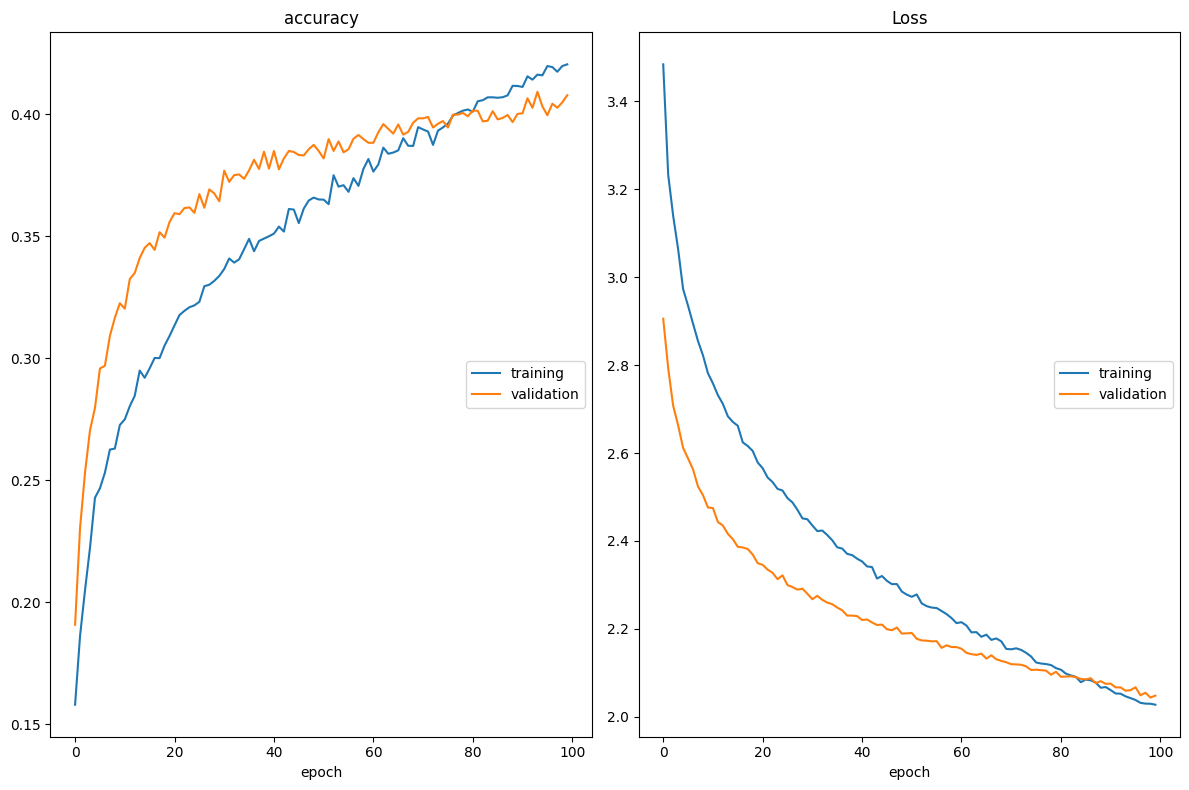

accuracy
	training         	 (min:    0.158, max:    0.420, cur:    0.420)
	validation       	 (min:    0.191, max:    0.409, cur:    0.408)
Loss
	training         	 (min:    2.027, max:    3.484, cur:    2.027)
	validation       	 (min:    2.043, max:    2.906, cur:    2.048)
448/448 [==============================] - 57s 128ms/step - loss: 2.0272 - accuracy: 0.4204 - val_loss: 2.0479 - val_accuracy: 0.4078


In [10]:
checkpoint = ModelCheckpoint("emotion_detection_mobilenetv2.h5")
callbacks = [PlotLossesKerasTF(), checkpoint]
model.fit(train_data,
          steps_per_epoch=train_data.samples/batch_size,
          validation_data=validation_data,
          validation_steps=validation_data.samples/batch_size,
          epochs=100,
          callbacks=callbacks
          )

In [11]:
model.save('emotion_detection_mobilenetv2.h5')

In [2]:
loaded_model=keras.models.load_model("emotion_detection_mobilenetv2.h5")

In [5]:
datagen_validation = ImageDataGenerator(rescale = 1./255,)
validation_data = datagen_validation.flow_from_directory("test/",
                                                    target_size=(48,48),
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 7178 images belonging to 7 classes.


In [6]:
CNN_Predictions = loaded_model.predict(validation_data)
# Choosing highest probalbilty class in every prediction 
CNN_Predictions = np.argmax(CNN_Predictions, axis=1)

225/225 [==============================] - 14s 55ms/step


Text(0.5, 1.0, 'CNN Confusion Matrix Model 1')

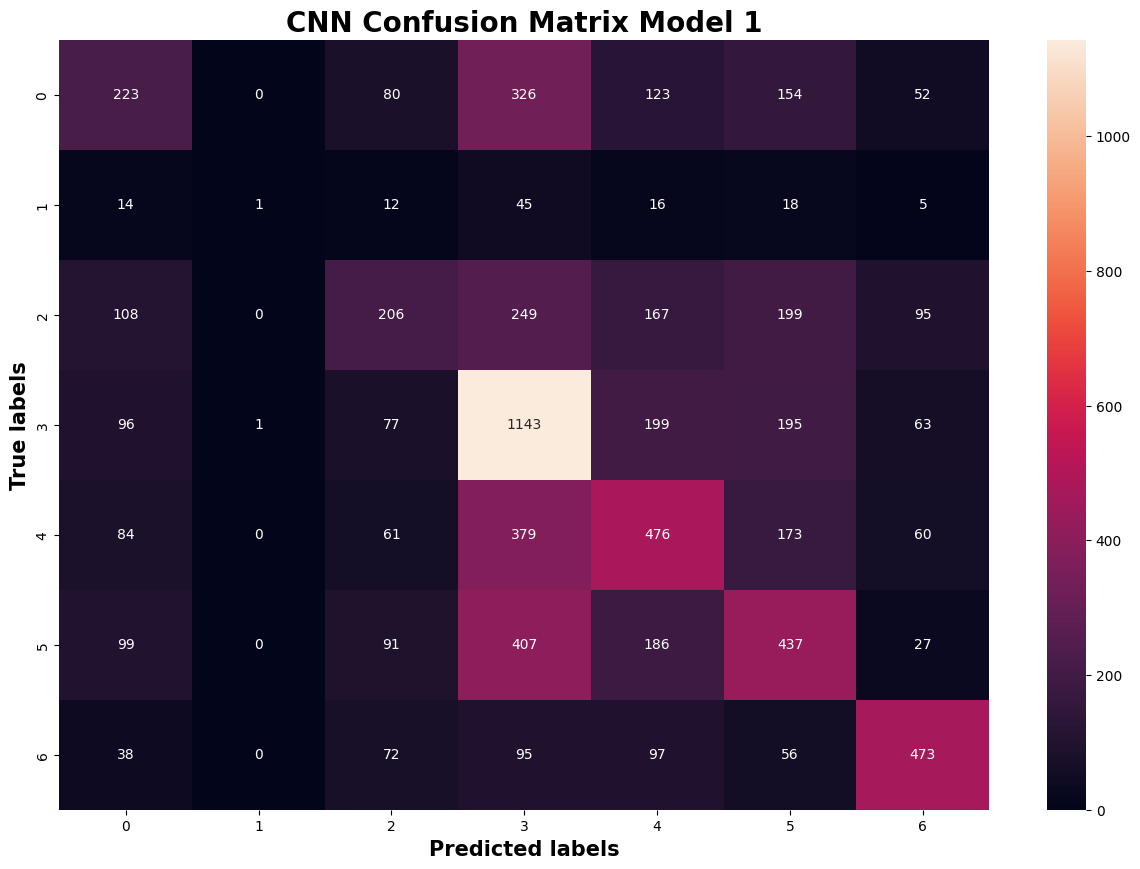

In [7]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

fig, ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(validation_data.labels, CNN_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('CNN Confusion Matrix Model 1', fontsize=20, fontweight='bold')

In [34]:
prediction=loaded_model.predict(validation_data)

113/113 [==============================] - 11s 99ms/step


In [4]:
import cv2
frame = cv2.imread('1.jpg')

In [5]:
frame.shape

(183, 275, 3)

In [6]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

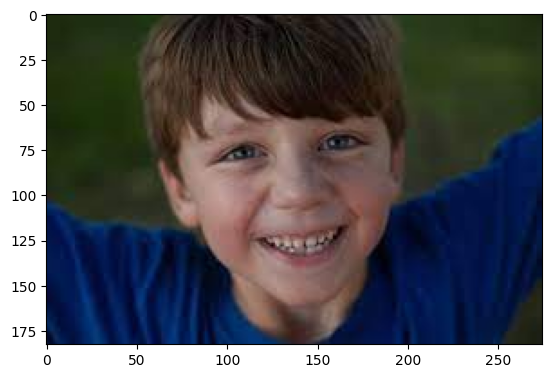

In [7]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [10]:
faces=faceCascade.detectMultiScale(frame,1.1,4)
for x,y,w,h in faces :
    roi_gray=frame[y:y+h,x:x+w]
    roi_color=frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)##BGR
    faces = faceCascade.detectMultiScale(roi_gray)
    if len(faces)==0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in faces:
            face_roi=roi_color[ey: ey+eh,ex:ex + ew]

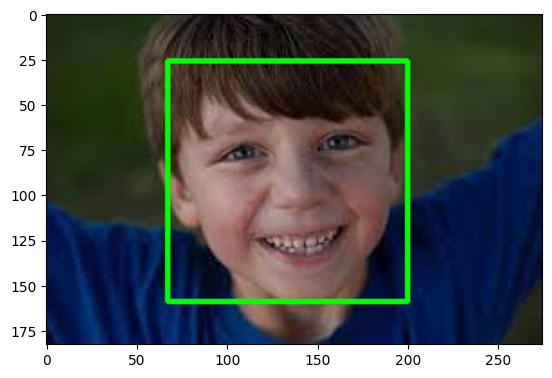

In [11]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

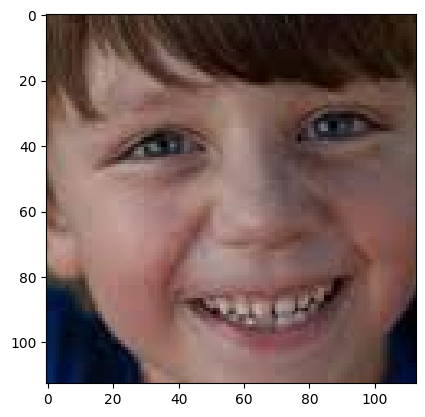

In [12]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [55]:
face_roi.shape

(104, 104, 3)

In [19]:
final_image=cv2.resize(face_roi,(48,48))
final_image=np.expand_dims(final_image,axis=0)##need fourth dimesnion
final_image=final_image/255.0##normalizing
final_image.shape

(1, 48, 48, 3)

In [20]:
Predictions=loaded_model.predict(final_image)

1/1 [==============================] - 0s 30ms/step


In [21]:
Predictions[0]

array([0.22738327, 0.01360816, 0.1377383 , 0.13432993, 0.1946124 ,
       0.2732312 , 0.01909672], dtype=float32)

In [22]:
Predictions=loaded_model.predict(final_image)
prediction=np.argmax(Predictions, axis=1)
if prediction==0:
    print('angry')
elif prediction==1:
    print('disgust')
elif prediction==2:
    print('fear')
elif prediction==3:
    print('happy')
elif prediction==4:
    print('neutral')
elif prediction==5:
    print('sad')
elif prediction==6:
    print('surprise')

1/1 [==============================] - 0s 31ms/step
sad


In [77]:
import cv2
path = 'haarcascade_frontalface_default.xml'
font_scale=1.5
font =cv2.FONT_HERSHEY_PLAIN
rectangle_bgr=(255,255,255)
img=np.zeros((255,255))
text="Some text in a box"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
text_offset_x=10
text_offset_y=img.shape[0]-25
box_coords=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Can not open webcam')
while True:
    ret,frame=cap.read()
    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)##BGR
        faces = faceCascade.detectMultiScale(roi_gray)
        if len(faces)==0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in faces:
                face_roi=roi_color[ey:ey+eh,ex:ex+ew]
        gray_scale = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)
        final_image=cv2.resize(gray_scale,(48,48))
        final_image=np.expand_dims(final_image,axis=0)##need fourth dimesnion
        final_image=final_image/255.0##normalizing
        
        Predictions=new_model.predict(final_image)
        if(np.argmax(Predictions)==0):
            status='Angry'
            x1,y1,w1,h1=0,0,175,75
            cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
            cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        elif (np.argmax(Predictions)==1):
            status='Disgust'
            x1,y1,w1,h1=0,0,175,75
            cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
            cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        elif (np.argmax(Predictions)==2):
            status='Fear'
            x1,y1,w1,h1=0,0,175,75
            cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
            cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        elif (np.argmax(Predictions)==3):
            status='Happy'
            x1,y1,w1,h1=0,0,175,75
            cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
            cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        elif (np.argmax(Predictions)==4):
            status='Sad'
            x1,y1,w1,h1=0,0,175,75
            cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
            cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        elif (np.argmax(Predictions)==5):
            status='Surprise'
            x1,y1,w1,h1=0,0,175,75
            cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
            cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        else:
            status='Neutral'
            x1,y1,w1,h1=0,0,175,75
            cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
            cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0))
            

Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 23ms/step
Face not detected
1/1 [==============================] - 0s 16ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/

KeyboardInterrupt: 